Using target: ZINC03832339
Loaded 235 candidate molecules.

--- Analyzing Candidate 0 ---

=== Building MWIS QUBO for candidate 0: ZINC00000897 ===
Conflict graph has 221 nodes (candidate matches)
and 12510 edges (conflicts).

Conflict-graph nodes with weights:
  0: (T0 C ↔ C1 C) w=0.611
  1: (T0 C ↔ C2 C) w=0.667
  2: (T0 C ↔ C4 C) w=0.667
  3: (T0 C ↔ C7 C) w=0.667
  4: (T0 C ↔ C8 C) w=0.611
  5: (T0 C ↔ C9 C) w=0.611
  6: (T0 C ↔ C11 C) w=0.667
  7: (T0 C ↔ C13 C) w=0.611
  8: (T0 C ↔ C15 C) w=0.667
  9: (T0 C ↔ C17 C) w=0.833
  10: (T1 C ↔ C1 C) w=0.667
  11: (T1 C ↔ C2 C) w=0.611
  12: (T1 C ↔ C4 C) w=0.611
  13: (T1 C ↔ C7 C) w=0.667
  14: (T1 C ↔ C8 C) w=0.667
  15: (T1 C ↔ C9 C) w=0.667
  16: (T1 C ↔ C11 C) w=0.667
  17: (T1 C ↔ C13 C) w=0.667
  18: (T1 C ↔ C15 C) w=0.611
  19: (T1 C ↔ C17 C) w=0.778
  20: (T2 C ↔ C1 C) w=0.778
  21: (T2 C ↔ C2 C) w=0.611
  22: (T2 C ↔ C4 C) w=0.611
  23: (T2 C ↔ C7 C) w=0.667
  24: (T2 C ↔ C8 C) w=0.611
  25: (T2 C ↔ C9 C) w=0.611
  26: (T2 C 

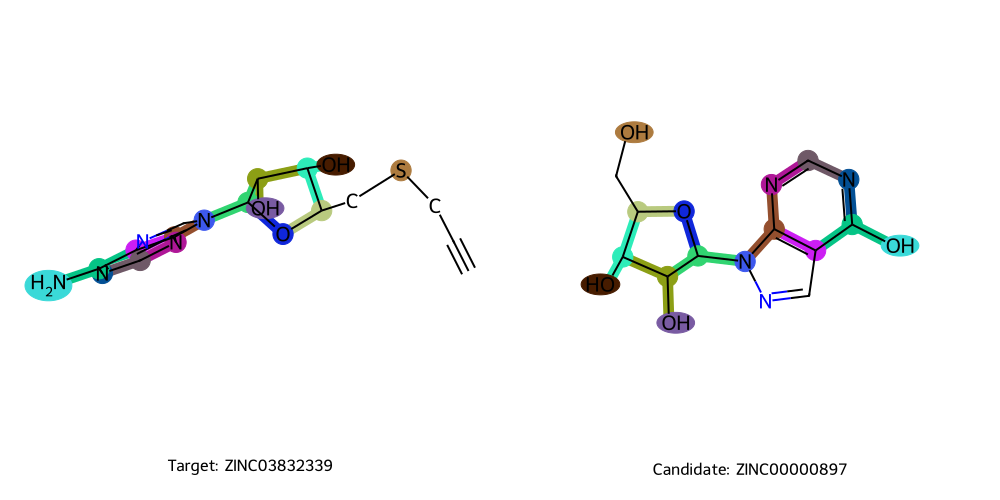




--- Analyzing Candidate 1 ---

=== Building MWIS QUBO for candidate 1: ZINC00002092 ===
Conflict graph has 234 nodes (candidate matches)
and 13378 edges (conflicts).

Conflict-graph nodes with weights:
  0: (T0 C ↔ C0 C) w=0.833
  1: (T0 C ↔ C1 C) w=0.778
  2: (T0 C ↔ C3 C) w=0.667
  3: (T0 C ↔ C4 C) w=0.667
  4: (T0 C ↔ C5 C) w=0.611
  5: (T0 C ↔ C10 C) w=0.611
  6: (T0 C ↔ C11 C) w=0.667
  7: (T0 C ↔ C12 C) w=0.667
  8: (T0 C ↔ C13 C) w=0.611
  9: (T0 C ↔ C15 C) w=0.667
  10: (T0 C ↔ C16 C) w=0.667
  11: (T0 C ↔ C18 C) w=0.778
  12: (T1 C ↔ C0 C) w=0.778
  13: (T1 C ↔ C1 C) w=0.833
  14: (T1 C ↔ C3 C) w=0.667
  15: (T1 C ↔ C4 C) w=0.667
  16: (T1 C ↔ C5 C) w=0.667
  17: (T1 C ↔ C10 C) w=0.667
  18: (T1 C ↔ C11 C) w=0.667
  19: (T1 C ↔ C12 C) w=0.667
  20: (T1 C ↔ C13 C) w=0.667
  21: (T1 C ↔ C15 C) w=0.667
  22: (T1 C ↔ C16 C) w=0.667
  23: (T1 C ↔ C18 C) w=0.833
  24: (T2 C ↔ C0 C) w=0.778
  25: (T2 C ↔ C1 C) w=0.944
  26: (T2 C ↔ C3 C) w=0.667
  27: (T2 C ↔ C4 C) w=0.667
  28: (

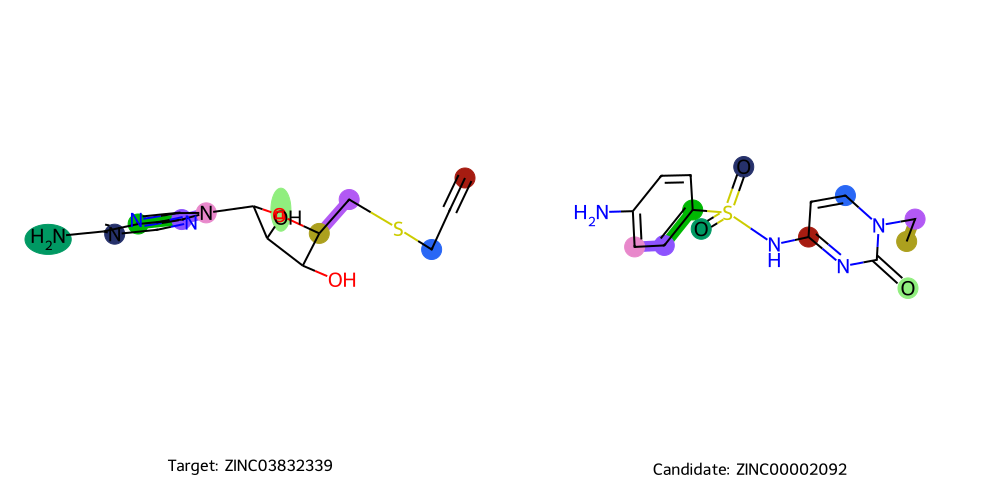

In [ ]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToGridImage

try:
    from IPython.display import display, Image as IPyImage
except ImportError:
    def display(x): print(f"[Display placeholder]: {x}")
    IPyImage = lambda x: print(f"Image placeholder for {x}")

try:
    from modules.molecular_graph import MolecularGraphDA
    from modules.conflict_graph import ConflictGraph
    from modules.load_molecules import MolLoader
except ImportError:
    class MolLoader:
        def load_molecules_DA(self):
            mol1 = Chem.MolFromSmiles("O=C(O)c1ccccc1C(=O)O")
            mol2 = Chem.MolFromSmiles("O=C(O)c1ccc(C(=O)O)cc1")
            mol3 = Chem.MolFromSmiles("CC(=O)Oc1ccccc1C(=O)O")
            mol4 = Chem.MolFromSmiles("c1ccccc1")
            target_mols = {"target_phthalic_acid": mol1}
            candidate_mols = {
                "cand_terephthalic_acid": mol2,
                "cand_aspirin": mol3,
                "cand_benzene": mol4
            }
            return target_mols, candidate_mols

    class MockAtomFeatures:
        def __init__(self, z): self.atomic_nb = z

    class MolecularGraphDA:
        def __init__(self, mol, mol_name, ft_factory):
            self.mol = mol
            self.mol_name = mol_name
            self.mol_graph = nx.Graph()
            for i, atom in enumerate(mol.GetAtoms()):
                self.mol_graph.add_node(i, features=MockAtomFeatures(atom.GetAtomicNum()))

    class ConflictGraph:
        def __init__(self, target_graph, candidate_graph, second_neighbour):
            self.graph = nx.Graph()
            if target_graph.mol_name == "target_phthalic_acid":
                if candidate_graph.mol_name == "cand_terephthalic_acid":
                    matches = [(i, i) for i in range(11)]
                    for (t, c) in matches:
                        self.graph.add_node((t, c), weight=np.random.uniform(0.8, 1.0))
                elif candidate_graph.mol_name == "cand_aspirin":
                    matches = [(i, i + 6) for i in range(10)]
                    for (t, c) in matches:
                        self.graph.add_node((t, c), weight=np.random.uniform(0.5, 0.8))
                else:
                    matches = [(i, i) for i in range(6)]
                    for (t, c) in matches:
                        self.graph.add_node((t, c), weight=np.random.uniform(0.3, 0.5))

from dadk.QUBOSolverCPU import QUBOSolverCPU, OptimizationMethod, ScalingAction
from dadk.Solution_SolutionList import SolutionList
from dadk.BinPol import BinPol


def atomic_symbol(Z):
    periodic = {1: "H", 6: "C", 7: "N", 8: "O", 9: "F", 15: "P", 16: "S", 17: "Cl", 35: "Br", 53: "I"}
    if isinstance(Z, dict): return "R"
    try: z_int = int(Z)
    except (TypeError, ValueError): return str(Z)
    return periodic.get(z_int, f"Z{z_int}")


loader = MolLoader()
target_mols_dict, candidate_mols_dict = loader.load_molecules_DA()
target_name, target_mol = next(iter(target_mols_dict.items()))
candidate_items = list(candidate_mols_dict.items())


def build_conflict_and_qubo_for_candidate(n, base_margin=0.1, type_multiplier=None, verbose=True):
    cand_name, cand_mol = candidate_items[n]
    target_graph = MolecularGraphDA(target_mol, mol_name=target_name, ft_factory="Gobbi")
    candidate_graph = MolecularGraphDA(cand_mol, mol_name=cand_name, ft_factory="Gobbi")
    conflict = ConflictGraph(target_graph, candidate_graph, second_neighbour=True)
    nodes = list(conflict.graph.nodes)

    if type_multiplier is None:
        type_multiplier = {
            "bijection": 10.0, "bond_type": 8.0,
            "edge": 5.0, "distance": 2.0, "second_neighbour": 2.0
        }

    N = len(nodes)
    H = np.zeros((N, N))
    for i, n_node in enumerate(nodes):
        H[i, i] = -float(conflict.graph.nodes[n_node]["weight"])

    for (u, v, data) in conflict.graph.edges(data=True):
        i, j = nodes.index(u), nodes.index(v)
        w_u = float(conflict.graph.nodes[u]["weight"])
        w_v = float(conflict.graph.nodes[v]["weight"])
        base_lambda = max(w_u, w_v) + base_margin
        severities = [type_multiplier.get(t, 1.5) for t in data.get("type", [])]
        severity = max(severities) if severities else 1.5
        lambda_ij = base_lambda * severity
        H[i, j] = H[j, i] = lambda_ij

    if verbose:
        print(f"\nCandidate {n}: {cand_name}")
        print(f"Conflict graph: {len(nodes)} nodes, {conflict.graph.number_of_edges()} edges.")
        for i, n_node in enumerate(nodes):
            t_idx, c_idx = n_node
            t_feat_z = target_graph.mol_graph.nodes[t_idx]["features"].atomic_nb
            c_feat_z = candidate_graph.mol_graph.nodes[c_idx]["features"].atomic_nb
            print(f"  {i}: (T{t_idx} {atomic_symbol(t_feat_z)} ↔ C{c_idx} {atomic_symbol(c_feat_z)}) "
                  f"w={conflict.graph.nodes[n_node]['weight']:.3f}")
    return conflict, target_graph, candidate_graph, nodes, H


def solve_mwis_with_da(nodes, H, conflict, target_graph, candidate_graph, graphics=False, verbose=True):
    N = len(nodes)
    if N == 0:
        if verbose: print("No compatible nodes.")
        return np.array([]), []

    qubo = BinPol()
    for i in range(N):
        qubo.set_term(H[i, i], (i,))
        for j in range(i):
            if H[i, j] != 0.0:
                qubo.set_term(H[i, j], (i, j))

    solver = QUBOSolverCPU(
        optimization_method=OptimizationMethod.annealing,
        number_iterations=100000, number_runs=10,
        scaling_bit_precision=16, scaling_action=ScalingAction.NOTHING,
        temperature_start=5000.0, temperature_end=0.01,
        temperature_mode=0, temperature_interval=10,
        offset_increase_rate=10000.0, gra


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToGridImage
import random # For generating unique colors
import json # For printing the final dictionary

# --- FIX: Import display for notebooks ---
try:
    from IPython.display import display, Image as IPyImage # Rename Image to avoid conflict
except ImportError:
    print("Warning: IPython.display not found. Plots will not be shown inline.")
    # Fallback function if not in an IPython environment
    def display(x):
        print(f"[Placeholder for display]: {x}")
    IPyImage = lambda x: print(f"Image placeholder for {x}") # Dummy for saving fallback


# --- Assume these modules are in the correct path ---
# (Using placeholder classes to make script runnable for demonstration
#  if modules are not found, but your real modules will be used)
try:
    from modules.molecular_graph import MolecularGraphDA
    from modules.conflict_graph import ConflictGraph
    from modules.load_molecules import MolLoader
except ImportError:
    print("Warning: Could not import custom modules. Using placeholders.")
    # Placeholder classes
    class MolLoader:
        def load_molecules_DA(self):
            # Create dummy RDKit mols for a runnable example
            mol1 = Chem.MolFromSmiles("O=C(O)c1ccccc1C(=O)O") # Target (Phthalic acid)
            mol2 = Chem.MolFromSmiles("O=C(O)c1ccc(C(=O)O)cc1") # Candidate 0 (Terephthalic acid)
            mol3 = Chem.MolFromSmiles("CC(=O)Oc1ccccc1C(=O)O") # Candidate 1 (Aspirin)
            mol4 = Chem.MolFromSmiles("c1ccccc1") # Candidate 2 (Benzene)
            target_mols = {"target_phthalic_acid": mol1}
            candidate_mols = {
                "cand_terephthalic_acid": mol2,
                "cand_aspirin": mol3,
                "cand_benzene": mol4
            }
            return target_mols, candidate_mols
    class MockGraph:
        def __init__(self):
            self.graph = nx.Graph()
            self.mol_graph = nx.Graph() # Mock mol_graph
            self.nodes = {}
    class MolecularGraphDA:
        def __init__(self, mol, mol_name, ft_factory):
            self.mol = mol
            self.mol_name = mol_name
            self.mol_graph = nx.Graph() # Mock
            # Add dummy nodes to mock graph based on mol
            for i, atom in enumerate(mol.GetAtoms()):
                self.mol_graph.add_node(i, features=MockAtomFeatures(atom.GetAtomicNum()))
        def number_of_nodes(self): # Helper for mock
            return self.mol.GetNumAtoms()
    class MockAtomFeatures:
        def __init__(self, z):
            self.atomic_nb = z
    class ConflictGraph:
        def __init__(self, target_graph, candidate_graph, second_neighbour):
            self.graph = nx.Graph()
            # Mock: Create some dummy matches and conflicts for demonstration
            if target_graph.mol_name == "target_phthalic_acid":
                if candidate_graph.mol_name == "cand_terephthalic_acid":
                    # Good match
                    matches = [(0,0), (1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10)]
                    for (t,c) in matches:
                        self.graph.add_node((t,c), weight=np.random.uniform(0.8, 1.0))
                    # Add a conflict
                    if (0,0) in self.graph and (1,2) in self.graph:
                         self.graph.add_edge((0,0), (1,2), type=["bijection"])
                elif candidate_graph.mol_name == "cand_aspirin":
                     # Partial match
                    matches = [(2,6), (3,7), (4,8), (5,9), (6,10), (7,11), (8,12), (9,13), (10,14), (11,15)]
                    for (t,c) in matches:
                        self.graph.add_node((t,c), weight=np.random.uniform(0.5, 0.8))
                else:
                    # Poor match (benzene)
                    matches = [(2,0), (3,1), (4,2), (5,3), (6,4), (7,5)]
                    for (t,c) in matches:
                        self.graph.add_node((t,c), weight=np.random.uniform(0.3, 0.5))

from dadk.QUBOSolverCPU import QUBOSolverCPU, OptimizationMethod, ScalingAction
from dadk.Solution_SolutionList import SolutionList
from dadk.BinPol import BinPol

# ============================================================
# 0) Your atomic_symbol helper (unchanged)
# ============================================================
def atomic_symbol(Z) -> str:
    periodic = {
        1: "H", 6: "C", 7: "N", 8: "O", 9: "F",
        15: "P", 16: "S", 17: "Cl", 35: "Br", 53: "I",
    }
    if isinstance(Z, dict): return "R"
    try: z_int = int(Z)
    except (TypeError, ValueError): return str(Z)
    return periodic.get(z_int, f"Z{z_int}")


# ============================================================
# 1) Load real molecules locally (DA set)
# ============================================================
loader = MolLoader()
target_mols_dict, candidate_mols_dict = loader.load_molecules_DA()

target_name, target_mol = next(iter(target_mols_dict.items()))
print(f"Using target: {target_name}")

candidate_items = list(candidate_mols_dict.items())
print(f"Loaded {len(candidate_items)} candidate molecules.")


# ============================================================
# 2) Helper: build conflict graph + QUBO H (FINAL FIXED VERSION)
# ============================================================
def build_conflict_and_qubo_for_candidate(n,
                                          base_margin=0.1,
                                          type_multiplier=None,
                                          verbose=True,
                                          REWARD_AMPLIFIER = 5.0): # <-- NEW PARAMETER
    """
    For candidate index n:
      - build MolecularGraphDA for target & candidate
      - build ConflictGraph
      - build MWIS QUBO matrix H
    Returns:
      conflict, target_graph, candidate_graph, nodes, H
    """
    if n >= len(candidate_items):
        raise IndexError(f"Candidate index {n} out of range [0, {len(candidate_items)-1}]")

    cand_name, cand_mol = candidate_items[n]
    if verbose:
        print(f"\n=== Building MWIS QUBO for candidate {n}: {cand_name} ===")

    # 1) Molecular graphs
    target_graph = MolecularGraphDA(target_mol, mol_name=target_name, ft_factory="Gobbi")
    candidate_graph = MolecularGraphDA(cand_mol, mol_name=cand_name, ft_factory="Gobbi")

    # 2) Conflict graph
    conflict = ConflictGraph(target_graph, candidate_graph, second_neighbour=True)
    nodes = list(conflict.graph.nodes)

    if verbose:
        print(f"Conflict graph has {len(nodes)} nodes (candidate matches)")
        print(f"and {conflict.graph.number_of_edges()} edges (conflicts).")

    if len(nodes) == 0:
        H = np.zeros((0, 0))
        return conflict, target_graph, candidate_graph, nodes, H

    # 3) Build QUBO matrix H
    
    # === FIX #1: STRENGTHENED REQUIREMENTS ===
    if type_multiplier is None:
        type_multiplier = {
            "bijection": 10.0,
            "bond_type": 8.0,
            "edge": 5.0,
            "distance": 2.0,
            "second_neighbour": 2.0,
        }

    N = len(nodes)
    H = np.zeros((N, N))

    # Diagonal terms: -w_i
    for i, n_node in enumerate(nodes):
        w_i = float(conflict.graph.nodes[n_node]["weight"])
        # === FIX #3: AMPLIFY REWARD SIGNAL ===
        H[i, i] = -w_i * REWARD_AMPLIFIER
        # ====================================

    # Off-diagonal terms for conflicts
    for (u, v, data) in conflict.graph.edges(data=True):
        i = nodes.index(u)
        j = nodes.index(v)

        w_u = float(conflict.graph.nodes[u]["weight"])
        w_v = float(conflict.graph.nodes[v]["weight"])
        conflict_types = data.get("type", [])

        # === FIX #2: CRITICAL BUG FIX (min -> max) ===
        base_lambda = max(w_u, w_v) + base_margin # <-- CORRECT LOGIC
        # ============================================

        # Severity = max over involved conflict types
        if conflict_types:
            severities = [type_multiplier.get(t, 1.5) for t in conflict_types]
            severity = max(severities)
        else:
            severity = 1.5 # Default severity

        lambda_ij = base_lambda * severity

        H[i, j] = lambda_ij
        H[j, i] = lambda_ij

    if verbose:
        print("\nConflict-graph nodes with weights (and amplified H[i,i]):")
        for i, n_node in enumerate(nodes):
            (t_idx, c_idx) = n_node
            w_i = float(conflict.graph.nodes[n_node]['weight'])
            print(f"  {i}: (T{t_idx} ↔ C{c_idx}) w={w_i:.3f} -> H[i,i]={H[i,i]:.3f}")
        print("\nQUBO H built with MWIS penalties and amplified rewards.")

    return conflict, target_graph, candidate_graph, nodes, H


# ============================================================
# 3) Helper: solve QUBO with DA (MODIFIED)
# ============================================================
def solve_mwis_with_da(nodes, H, conflict, target_graph, candidate_graph,
                       graphics=True, verbose=True):
    """
    Given nodes, H, and graphs, run DA, return:
      configuration (x), solution_pairs [(t_idx, c_idx), ...], summary_string
    """
    N = len(nodes)
    
    # Handle the N=0 case
    max_nodes_N0 = max(
        target_graph.mol.GetNumAtoms(),
        candidate_graph.mol.GetNumAtoms()
    )
    if N == 0:
        if verbose: print("\n=== DA solution ===\nNo compatible nodes. Trivial solution.")
        summary_string = f"0 / {max_nodes_N0} matches (0.000 of max nodes)"
        return np.array([]), [], summary_string

    qubo = BinPol()
    for i in range(N):
        qubo.set_term(H[i, i], (i,))
        for j in range(i):
            if H[i, j] != 0.0:
                qubo.set_term(H[i, j], (i, j))

    solver = QUBOSolverCPU(
        optimization_method=OptimizationMethod.annealing,
        number_iterations=100000,
        number_runs=2,
        scaling_bit_precision=16,
        scaling_action=ScalingAction.AUTO_SCALING,
        temperature_start=5000.0,
        temperature_end=0.01,
        temperature_mode=0,
        temperature_interval=10,
        offset_increase_rate=10000.0,
        graphics=graphics,
    )

    solution_list: SolutionList = solver.minimize(qubo)
    solution = solution_list.get_minimum_energy_solution()
    configuration = np.array(solution.configuration, dtype=int)

    solution_pairs = [
        nodes[i]
        for i, bit in enumerate(configuration)
        if bit == 1
    ]

    # --- Create summary string ---
    max_nodes = max(
        target_graph.mol.GetNumAtoms(),
        candidate_graph.mol.GetNumAtoms()
    )
    selected_count = np.count_nonzero(configuration)
    frac = selected_count / max_nodes if max_nodes > 0 else 0
    summary_string = f"{selected_count} / {max_nodes} matches ({frac:.3f} of max nodes)"
    # ---

    if verbose:
        print("\n=== DA solution ===")
        print("x =", configuration.tolist())
        print(summary_string) # Still print if verbose
        print("\nSelected atom-pair matches:")
        for (t_idx, c_idx) in solution_pairs:
            t_atom = target_graph.mol.GetAtomWithIdx(t_idx)
            c_atom = candidate_graph.mol.GetAtomWithIdx(c_idx)
            print(
                f"  (T{t_idx} {t_atom.GetSymbol()}"
                f" ↔ C{c_idx} {c_atom.GetSymbol()})"
            )

    # Return the string
    return configuration, solution_pairs, summary_string


# ============================================================
# 4) analyze_mol(n): full pipeline (MODIFIED)
# ============================================================
def analyze_mol(n, plot=False, graphics=False, verbose=True):
    """
    Returns:
      configuration, solution_pairs, summary_string, t_mol, c_mol
    """
    conflict, target_graph, candidate_graph, nodes, H = build_conflict_and_qubo_for_candidate(
        n,
        verbose=verbose,
        REWARD_AMPLIFIER=5.0 # Keep the fix
    )

    configuration, solution_pairs, summary_string = solve_mwis_with_da(
        nodes, H, conflict, target_graph, candidate_graph,
        graphics=graphics,
        verbose=verbose
    )

    if plot and len(nodes) > 0:
        # This plots the CONFLICT graph, not the molecules
        plt.figure(figsize=(5, 4))
        pos_conf = nx.spring_layout(conflict.graph, seed=42)
        selected_set = {nodes[i] for i, bit in enumerate(configuration) if bit == 1}
        node_colors = [
            "#4CAF50" if node in selected_set else "#CCCCCC"
            for node in conflict.graph.nodes
        ]
        nx.draw(
            conflict.graph,
            pos=pos_conf,
            with_labels=True,
            node_color=node_colors,
            edgecolors="black",
            node_size=500,
            font_size=6,
        )
        plt.title(f"Conflict Graph - Selected MWIS (candidate {n})")
        plt.tight_layout()
        plt.show()

    # Return the RDKit mol objects for plotting
    return configuration, solution_pairs, summary_string, target_graph.mol, candidate_graph.mol


# ============================================================
# 5) HELPER: Visualize Atom-Pair Matches (Unchanged, but not called)
# ============================================================
def draw_atom_mapping(t_mol, c_mol, solution_pairs, t_name, c_name):
    """
    Draws target and candidate molecules side-by-side,
    highlighting matched atom pairs with common colors (no numbers),
    and returns the image object.
    """
    t_mol_copy = Chem.Mol(t_mol)
    c_mol_copy = Chem.Mol(c_mol)

    for atom in t_mol_copy.GetAtoms():
        if atom.HasProp("atomLabel"): atom.ClearProp("atomLabel")
    for atom in c_mol_copy.GetAtoms():
        if atom.HasProp("atomLabel"): atom.ClearProp("atomLabel")

    t_atoms_highlight = []
    c_atoms_highlight = []
    t_atom_colors = {}
    c_atom_colors = {}

    for t_idx, c_idx in solution_pairs:
        color_tuple = (random.random(), random.random(), random.random())
        t_atoms_highlight.append(t_idx)
        c_atoms_highlight.append(c_idx)
        t_atom_colors[t_idx] = color_tuple
        c_atom_colors[c_idx] = color_tuple

    img = MolsToGridImage(
        [t_mol_copy, c_mol_copy],
        legends=[f"Target: {t_name}", f"Candidate: {c_name}"],
        molsPerRow=2,
        subImgSize=(500, 500), # Increased size
        highlightAtomLists=[t_atoms_highlight, c_atoms_highlight],
        highlightAtomColors=[t_atom_colors, c_atom_colors]
    )
    
    return img


# ============================================================
# 6) NEW: Batch analysis of ALL candidates
# ============================================================
print(f"\n=== Running batch analysis for all {len(candidate_items)} candidates ===")

all_results = {}
for i in range(len(candidate_items)):
    cand_name, _ = candidate_items[i]
    print(f"Processing {i+1}/{len(candidate_items)}: {cand_name}...")
    
    try:
        # Run silently: no plots, no DA graphics, no verbose output
        configuration, _, summary, _, _ = analyze_mol(
            i, 
            plot=False, 
            graphics=False, 
            verbose=False # This suppresses the weight printing
        )
        
        all_results[cand_name] = {
            # Convert numpy array to a standard list for clean JSON/dict printing
            'configuration': configuration.tolist(), 
            'summary_string': summary
        }
    except Exception as e:
        print(f"  ERROR processing {cand_name}: {e}")
        all_results[cand_name] = {
            'configuration': [],
            'summary_string': f"Error: {e}"
        }

print("\n=== Batch analysis complete ===")
# Print the final dictionary in a readable format
print(json.dumps(all_results, indent=2))

output_filename = "batch_analysis_results_run2.json"
try:
    with open(output_filename, 'w') as f:
        json.dump(all_results, f, indent=2)
    print(f"Results successfully saved to: {output_filename}")
except Exception as e:
    print(f"ERROR: Could not save results to file. {e}")

Using target: ZINC03832339
Loaded 235 candidate molecules.

=== Running batch analysis for all 235 candidates ===
Processing 1/235: ZINC00000897...
Processing 2/235: ZINC00002092...
Processing 3/235: ZINC00003467...
Processing 4/235: ZINC00004050...
Processing 5/235: ZINC00004093...
Processing 6/235: ZINC00004189...
Processing 7/235: ZINC00004244...
Processing 8/235: ZINC00004253...
Processing 9/235: ZINC00004373...
Processing 10/235: ZINC00004392...
Processing 11/235: ZINC00004489...
Processing 12/235: ZINC00004565...
Processing 13/235: ZINC00004835...
Processing 14/235: ZINC00004857...
Processing 15/235: ZINC00004914...
Processing 16/235: ZINC00004965...
Processing 17/235: ZINC00005008...
Processing 18/235: ZINC00005231...
Processing 19/235: ZINC00005235...
Processing 20/235: ZINC00006044...
Processing 21/235: ZINC00006272...
Processing 22/235: ZINC00006470...
Processing 23/235: ZINC00006628...
Processing 24/235: ZINC00007572...
Processing 25/235: ZINC00007605...
Processing 26/235: Z